In [27]:
#######################
# standard code block #
#######################
%pylab inline
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")

#######################
#       imports       #
#######################
import pandas as pd

# seaborn.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [28]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import sent_tokenize
from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re

from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn import preprocessing

#from project4 import processing, group_by_sentiment, pickle_stuff, open_pickles, display_topics, model_nmf, model_lsa, inertia_curve, display_topics, ClusterIndicesNumpy

In [30]:
filepath = '/Users/tim/src/Metis/Project_4/data/interim/processed_text.pkl'
with open(filepath, 'rb') as pkl:
    processed_text = pickle.load(pkl)

In [31]:
mwe_tokenizer = MWETokenizer([('customer','service'), ('hard', 'to'), ('over', 'seas'),
                              ('user', 'friendly'), ('long','time'), ('front', 'of', 'house'),
                              ('back', 'of', 'house'), ('behind', 'the', 'times'),
                              ('out', 'of', 'date'), ('easy', 'to')])
sent_token = mwe_tokenizer.tokenize(sent_tokenize(processed_text))
len(sent_token)

825

In [32]:
df_list = ['tf_vector', 'gram2_cv_vector', 'gram2_tf_vector', 'gram3_cv_vector', 'gram3_tf_vector']

pickles = open_pickles(df_list)

In [54]:
topic_word, nmf_model, doc_topic = model_nmf(pickles['tf_vector'], 4)

In [55]:
display_topics(nmf_model, pickles['tf_vector'].columns, 8)


Topic  0
use, easy, ease, learn, house, restaurant, front, employees

Topic  1
system, restaurant, time, used, like, would, software, best

Topic  2
user, friendly, interface, managed, worked, really, quick, management

Topic  3
support, customer, local, ncr, helps, great, responsive, good


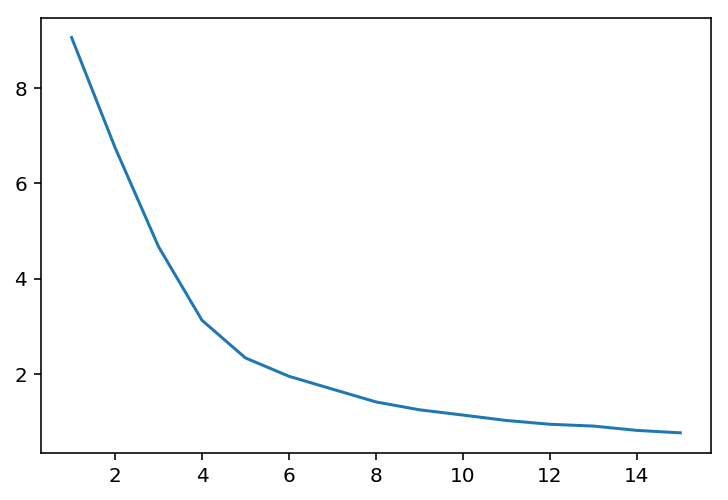

In [56]:
curve = inertia_curve(1,15, doc_topic)
plt.plot(list(curve.keys()),list(curve.values()))
plt.show()

In [57]:
temp = pd.DataFrame(doc_topic)
temp2 = preprocessing.normalize(temp, norm='l1', axis=1, copy=True, return_norm=False)

In [58]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters,random_state=10)
km.fit(temp2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [59]:
# display_cluster(doc_topic, km, num_clusters=num_clusters)
#display_cluster(temp2, km, num_clusters=num_clusters)

In [60]:
review_dict = {}
review_list = []

# Get cluster
for num in range(num_clusters):
    # Get points
    review_list = []
    for i,j in enumerate(ClusterIndicesNumpy(num, km.labels_)):
        #Append points to list
        review_list.append(str(i +1) +"." + sent_token[j])
    # Match list to cluster    
    review_dict["Category_" + str(num)] = review_list

In [61]:
review_dict

{'Category_0': ['1.there seems to be a problem with ncr tears loading old back points which erases all the programming that we are  is pretty user friendly for staff  like that i can add modified to help encourage up-selling.',
  '2.modified venus help encourage staff to up-sell.',
  '3.it is user friendly for serves and management.',
  '4..',
  '5..',
  '6.all restaurant companies need some sort of pos system to communicate orders to the  still works after  years, easy to update and user friendly platform for serves and bartendersit is expensive to upgrade and update, very expensive to maintain and performing maintenance is expensive.',
  '7.shameful.',
  '8.example: draft tile would know what current drafts are in the submenu and update when a user logs into the pp.',
  '9.But  do not have to use pen and  has an incredibly simple user interface, as well as complex capabilities.',
  '10.solid it support, as well as very user friendly interface, and the coursing system in place for fin